#**Extraction Method**

# Install necessary dependencies

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Get Text Document

We use the description of a very popular role-playing game (RPG) Skyrim from
Bethesda Softworks for summarization. 

In [ ]:
DOCUMENT = """
The Elder Scrolls V: Skyrim is an action role-playing video game developed by Bethesda Game Studios 
and published by Bethesda Softworks. It is the fifth main installment in The Elder Scrolls series, 
following The Elder Scrolls IV: Oblivion.
The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, 
a dragon who is prophesied to destroy the world. The game is set 200 years after the events of Oblivion 
and takes place in the fictional province of Skyrim. Over the course of the game, the player completes 
quests and develops the character by improving skills. The game continues the open-world tradition of 
its predecessors by allowing the player to travel anywhere in the game world at any time, and to ignore 
or postpone the main storyline indefinitely.
The team opted for a unique and more diverse open world than Oblivion's Imperial Province of Cyrodiil, 
which game director and executive producer Todd Howard considered less interesting by comparison. 
The game was released to critical acclaim, with reviewers particularly mentioning the character advancement 
and setting, and is considered to be one of the greatest video games of all time.


The Elder Scrolls V: Skyrim is an action role-playing game, playable from either a first or 
third-person perspective. The player may freely roam over the land of Skyrim which is an open world 
environment consisting of wilderness expanses, dungeons, cities, towns, fortresses, and villages. 
Players may navigate the game world more quickly by riding horses or by utilizing a fast-travel system 
which allows them to warp to previously discovered locations. The game's main quest can be completed or 
ignored at the player's preference after the first stage of the quest is finished. However, some quests 
rely on the main storyline being at least partially completed. Non-player characters (NPCs) populate the 
world and can be interacted with in a number of ways: the player may engage them in conversation, 
marry an eligible NPC, kill them or engage in a nonlethal "brawl". The player may 
choose to join factions which are organized groups of NPCs — for example, the Dark Brotherhood, a band 
of assassins. Each of the factions has an associated quest path to progress through. Each city and town 
in the game world has jobs that the player can engage in, such as farming.

Players have the option to develop their character. At the beginning of the game, players create 
their character by selecting their sex and choosing between one of several races including humans, 
orcs, elves, and anthropomorphic cat or lizard-like creatures and then customizing their character's 
appearance. Over the course of the game, players improve their character's skills which are numerical 
representations of their ability in certain areas. There are eighteen skills divided evenly among the 
three schools of combat, magic, and stealth. When players have trained skills enough to meet the 
required experience, their character levels up. Health is depleted primarily when the player 
takes damage and the loss of all health results in death. Magicka is depleted by the use of spells, 
certain poisons and by being struck by lightning-based attacks. Stamina determines the player's 
effectiveness in combat and is depleted by sprinting, performing heavy "power attacks" 
and being struck by frost-based attacks. Skyrim is the first entry in The Elder Scrolls to 
include dragons in the game's wilderness. Like other creatures, dragons are generated randomly in 
the world and will engage in combat with NPCs, creatures and the player. Some dragons may attack 
cities and towns when in their proximity. The player character can absorb the souls of dragons 
in order to use powerful spells called "dragon shouts" or "Thu'um". A regeneration 
period limits the player's use of shouts in gameplay.

Skyrim is set around 200 years after the events of The Elder Scrolls IV: Oblivion, although it is 
not a direct sequel. The game takes place in Skyrim, a province of the Empire on the continent of 
Tamriel, amid a civil war between two factions: the Stormcloaks, led by Ulfric Stormcloak, and the 
Imperial Legion, led by General Tullius. The player character is a Dragonborn, a mortal born with 
the soul and power of a dragon. Alduin, a large black dragon who returns to the land after being 
lost in time, serves as the game's primary antagonist. Alduin is the first dragon created by Akatosh, 
one of the series' gods, and is prophesied to destroy and consume the world.
"""

In [ ]:
import re

DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()

# Summarization with Gensim

Let’s look at an implementation of document summarization by leveraging Gensim’s
summarization module. It is pretty straightforward.

In [ ]:
from gensim.summarization import summarize

print(summarize(DOCUMENT, ratio=0.2, split=False))

Alduin, a large black dragon who returns to the land after being lost in time, serves as the game's primary antagonist.


In [ ]:
print(summarize(DOCUMENT, word_count=75, split=False))

The game takes place in Skyrim, a province of the Empire on the continent of Tamriel, amid a civil war between two factions: the Stormcloaks, led by Ulfric Stormcloak, and the Imperial Legion, led by General Tullius.
Alduin, a large black dragon who returns to the land after being lost in time, serves as the game's primary antagonist.
Alduin is the first dragon created by Akatosh, one of the series' gods, and is prophesied to destroy and consume the world.


In [ ]:
sentences = nltk.sent_tokenize(DOCUMENT)
len(sentences)

5

This summarization implementation from Gensim is based on a variation of
a popular algorithm called TextRank. 

# Basic Text pre-processing

In [ ]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['skyrim set around years events elder scrolls iv oblivion although direct sequel',
       'game takes place skyrim province empire continent tamriel amid civil war two factions stormcloaks led ulfric stormcloak imperial legion led general tullius',
       'player character dragonborn mortal born soul power dragon'],
      dtype='<U155')

# Text Representation with Feature Engineering

We will be vectorizing our normalized sentences using the TF-IDF feature engineering
scheme. We keep things simple and don’t filter out any words based on document
frequency. But feel free to try that out and maybe even leverage n-grams as features.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(61, 5)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4
akatosh,0.00,0.00,0.00,0.00,0.30
alduin,0.00,0.00,0.00,0.24,0.24
although,0.29,0.00,0.00,0.00,0.00
amid,0.00,0.21,0.00,0.00,0.00
antagonist,0.00,0.00,0.00,0.30,0.00
around,0.29,0.00,0.00,0.00,0.00
black,0.00,0.00,0.00,0.30,0.00
born,0.00,0.00,0.37,0.00,0.00
character,0.00,0.00,0.37,0.00,0.00
civil,0.00,0.21,0.00,0.00,0.00


In [ ]:
from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [ ]:
num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(61, 3) (3,) (3, 5)


In [ ]:
# remove singular values below threshold                                         
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [ ]:
salience_scores = np.sqrt(np.dot(np.square(singular_values), 
                                 np.square(topic_document_mat)))
salience_scores

array([0.72083708, 0.72083708, 1.        , 0.74130048, 0.74130048])

In [ ]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()

In [ ]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

Skyrim is set around 200 years after the events of The Elder Scrolls IV: Oblivion, although it is not a direct sequel.
The game takes place in Skyrim, a province of the Empire on the continent of Tamriel, amid a civil war between two factions: the Stormcloaks, led by Ulfric Stormcloak, and the Imperial Legion, led by General Tullius.
The player character is a Dragonborn, a mortal born with the soul and power of a dragon.
Alduin, a large black dragon who returns to the land after being lost in time, serves as the game's primary antagonist.
Alduin is the first dragon created by Akatosh, one of the series' gods, and is prophesied to destroy and consume the world.


# Build Similarity Matrix

In [ ]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(5, 5)


array([[1.   , 0.039, 0.   , 0.   , 0.   ],
       [0.039, 1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.049, 0.049],
       [0.   , 0.   , 0.049, 1.   , 0.099],
       [0.   , 0.   , 0.049, 0.099, 1.   ]])

# Build Similarity Graph

In [ ]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

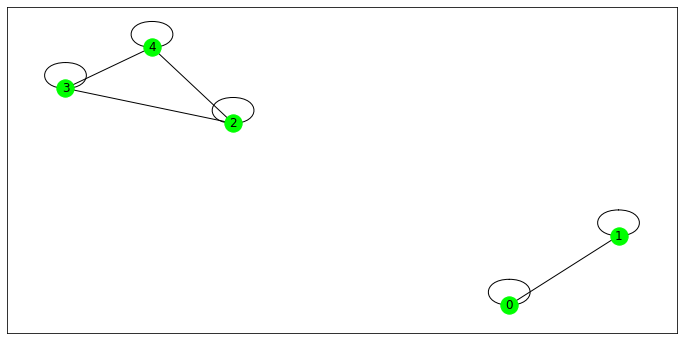

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

# Get Sentence Importance Scores

In [ ]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]

[(0.20125459640825902, 3),
 (0.201254596408259, 4),
 (0.20000000000000004, 1),
 (0.20000000000000004, 0),
 (0.19749080718348205, 2)]

In [ ]:
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()

IndexError: ignored

In [ ]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))